<a href="https://colab.research.google.com/github/cbowler1234/Ecgr4090_hw_1/blob/main/Hw2/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

from tensorflow.keras import Input, layers
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


print(tf.__version__)


2.4.1


In [140]:
cifar=tf.keras.datasets.cifar10


(train_images,train_labels), (test_images, test_labels)=cifar.load_data()
input_shape=train_images.shape[1:]

In [5]:
print(input_shape)

(32, 32, 3)


In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Text(0.5, 1.0, 'Label= [3]')

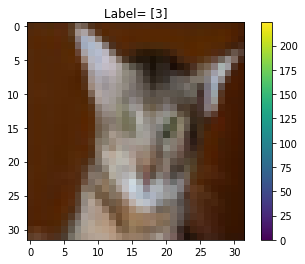

In [7]:
idx=24005
plt.figure()
plt.imshow(train_images[idx])
plt.colorbar()
plt.title("Label= {:}".format(train_labels[idx]))

In [32]:
model=tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3),strides=(2, 2), activation='relu', input_shape=input_shape, padding='same'),
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3),strides=(2, 2), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10) 
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                10250     
Total params: 1,079,242
Trainable params: 1,079,242
Non-trainable params: 0
____________________________________________

In [34]:
train_hist=model.fit(train_images,train_labels,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 5.2987 - accuracy: 0.3009
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3158 - accuracy: 0.5342
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1070 - accuracy: 0.6059
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9583 - accuracy: 0.6629
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8264 - accuracy: 0.7082
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6904 - accuracy: 0.7587
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5675 - accuracy: 0.8073
Epoch 8/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4538 - accuracy: 0.8447
Epoch 9/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3924 - accuracy: 0.8683
Epoch 10/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.339

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [142]:
train_hist.history

{'accuracy': [0.38868001103401184,
  0.5431200265884399,
  0.6006799936294556,
  0.6521599888801575,
  0.696340024471283,
  0.7426999807357788,
  0.7892199754714966,
  0.8273000121116638,
  0.8503599762916565,
  0.869979977607727,
  0.8834999799728394,
  0.8946200013160706,
  0.9052799940109253,
  0.914359986782074,
  0.9111199975013733,
  0.9188600182533264,
  0.9190400242805481,
  0.9269000291824341,
  0.9296600222587585,
  0.9354599714279175,
  0.9326199889183044,
  0.9307199716567993,
  0.9398599863052368,
  0.9379600286483765,
  0.9396200180053711,
  0.942520022392273,
  0.9398599863052368,
  0.9483799934387207,
  0.9408400058746338,
  0.9468600153923035,
  0.9505400061607361,
  0.9492999911308289,
  0.9480800032615662,
  0.9506999850273132,
  0.9507200121879578,
  0.9494600296020508,
  0.9557399749755859,
  0.9521600008010864,
  0.9551200270652771,
  0.9524999856948853,
  0.9588599801063538,
  0.9558799862861633,
  0.9579799771308899,
  0.9569000005722046,
  0.9610599875450134,
 

The Final Training Accuracy is approximatly 96 percent

In [38]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 10.2633 - accuracy: 0.5636


The Test Accuracy is Approxiamatly 56 percent

In [69]:
from PIL import Image


Duck=Image.open("/content/drive/MyDrive/Hw0 Images/Duckresize.jpg")



Text(0.5, 1.0, 'Label= [3]')

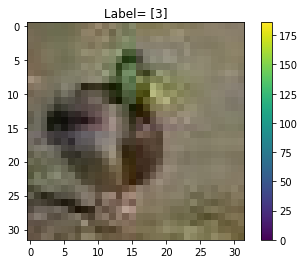

In [70]:
plt.figure()
plt.imshow(Duck)
plt.colorbar()
plt.title("Label= {:}".format(train_labels[idx]))

In [72]:
Duck = np.asarray(Duck)


In [74]:
Duck.shape

(32, 32, 3)

In [76]:
Duck = Duck.reshape(1, 32, 32, 3)

In [77]:
Duck.shape

(1, 32, 32, 3)

In [104]:
out_Duck=model.predict(Duck)

In [117]:
max_value = np.max(out_Duck)

max_index = np.where(out_Duck==max_value)
print(max_index)
print(max_value)

(array([0]), array([2]))
11.704337


In [116]:
print(out_Duck)

[[ -1.233511   -13.042733    11.704337    -0.47379363   6.420125
   -9.852236    -0.3085348  -13.13933    -16.714643   -22.804462  ]]


I am not sure how to import label_names but According to the website a bird should be the third index and the max value is the third index so the Network did properly identify the image

In [98]:
model_2=tf.keras.Sequential([
  tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3),strides=(2, 2), input_shape=input_shape, padding='same'),
  tf.keras.layers.Conv2D(32, kernel_size=(1, 1),strides=(1, 1), activation='relu',),
  tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3),strides=(2, 2), input_shape=input_shape, padding='same'),
  tf.keras.layers.Conv2D(64, kernel_size=(1, 1),strides=(1, 1), activation='relu',),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10) 
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_3 (Depthwis (None, 16, 16, 3)         30        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 32)        128       
_________________________________________________________________
depthwise_conv2d_4 (Depthwis (None, 8, 8, 32)          320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 64)          2112      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1024)            